In [324]:
import pandas as pd
import os
from datetime import datetime

SAMPLE_RATE = 64
HEADER_LINES = 2

PARTICIPANTE = 10

ATIVIDADE = 'AVD'
MARCHA = 'D'
SEQUENCIA = 2
SENSOR = 'BVP'

print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv')
print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv')
print('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv')

Dataset/Participante 10/V10_AVD_D_2/BVP.csv
Dataset/Participante 10/V10_AVD_D_2/tags.csv
Lifesenior/AVD_D_2/V10_AVD_D_2.csv


In [325]:
 #read file
 data = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv',index_col=False,header=None)
 data = data.rename(columns={0: 'bvp'})
 init_time_measure = data.iloc[0,0]
 print(data)
 print(init_time_measure)

               bvp
0     1.660937e+09
1     6.400000e+01
2    -0.000000e+00
3    -0.000000e+00
4    -0.000000e+00
...            ...
2208  1.310000e+00
2209  1.730000e+00
2210  1.760000e+00
2211  1.500000e+00
2212  1.100000e+00

[2213 rows x 1 columns]
1660937081.0


In [326]:
#read tags that inform init and end of activity
tags = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv',index_col=False,header=None)
print(tags)
print(tags.shape)

              0
0  1.660937e+09
1  1.660937e+09
(2, 1)


In [327]:
#store init and end activity time
init_activ_time = tags.iloc[0,0]
end_activ_time = tags.iloc[1,0]
print(init_activ_time)

1660937089.23


In [328]:
#calc time to cut in file init
lines_to_cut_init = init_activ_time - init_time_measure
lines_to_cut_init = int(lines_to_cut_init*SAMPLE_RATE)+HEADER_LINES
print(lines_to_cut_init)

528


In [329]:
#calc time to cut in file end
lines_to_cut_end = end_activ_time - init_time_measure
lines_to_cut_end = int(lines_to_cut_end*SAMPLE_RATE)+HEADER_LINES+1
print(lines_to_cut_end)

1725


(1197, 1)


<Axes: >

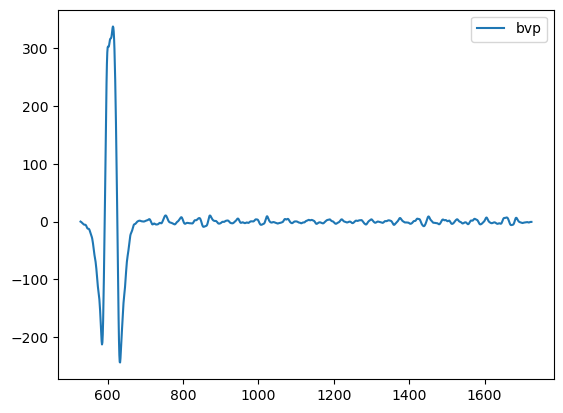

In [330]:
#get only samples from init to end tagged activity
formatted_data = data.iloc[lines_to_cut_init:lines_to_cut_end,:]
print(formatted_data.shape)
formatted_data.plot()


(598, 1)


<Axes: >

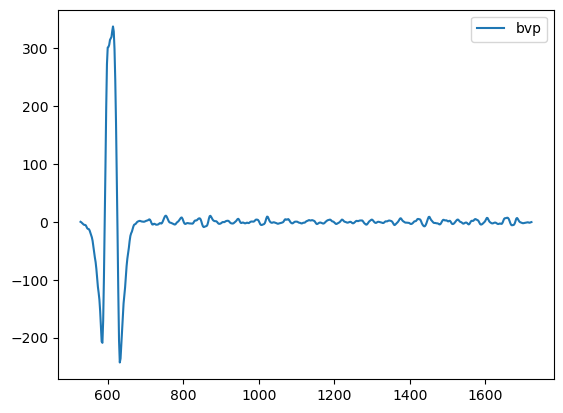

In [331]:
#reduce sampling from 64 to 32
formatted_data = formatted_data[0:-1:2]
print(formatted_data.shape)
formatted_data.plot()

In [332]:
print(formatted_data.shape)

(598, 1)


In [333]:
print(formatted_data)

       bvp
528   0.12
530  -0.66
532  -1.88
534  -3.19
536  -4.45
...    ...
1714 -0.94
1716 -1.41
1718 -1.37
1720 -0.74
1722 -0.38

[598 rows x 1 columns]


In [334]:
dataLifeSenior = pd.read_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv',index_col=False)
                            
diff_rows = formatted_data.shape[0]-dataLifeSenior.shape[0]

if(diff_rows == 1):
    #remove last row
    formatted_data = formatted_data[:-1] 

dataLifeSenior["bvp"] = formatted_data.values
print(dataLifeSenior)

        acc_x     acc_y     acc_z   bvp
0   -0.312500 -0.906250  0.203125  0.12
1   -0.296875 -0.937500  0.203125 -0.66
2   -0.250000 -0.843750  0.234375 -1.88
3   -0.234375 -0.890625  0.218750 -3.19
4   -0.390625 -0.906250  0.265625 -4.45
..        ...       ...       ...   ...
593 -0.250000 -0.984375  0.265625 -0.94
594 -0.343750 -0.875000  0.250000 -1.41
595 -0.296875 -0.875000  0.359375 -1.37
596 -0.343750 -0.906250  0.265625 -0.74
597 -0.343750 -0.921875  0.250000 -0.38

[598 rows x 4 columns]


In [335]:
#export the file to specific activity
dataLifeSenior.to_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv', index=False)